In [1]:
#export 
source("exp/nb_01.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘survival’ was built under R version 4.1.1”
Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [2]:
library(mlr)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.



In [3]:
library(survival)

In [4]:
# dfs = readRDS(paste(data_path,"dfs_filtered.rds", sep=""))
dfs = readRDS("../data/dfs_filtered_for_feature_selection.rds")
names(dfs)

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

In [6]:
#export
sample_ints = function(start, end, signature_size){sample(start:end, signature_size, replace=F)}

#export
sample_signature = function(df, size = 20){
    if(!is.data.frame(df)) stop("df must be data frame!")
    i = first_expr_col(df)
    e = dim(df)[2]
    indxs = sample_ints(i, e, size)
    genes = names(df)[indxs]
    list(indxs = indxs, genes = genes, cols4cox = c("survival_time", "event", genes))
}

replace_nas = function(m){
    m %>% mutate_all(~replace(., is.nan(.), 1))
}

#export
sample_list_of_signatures = function(df, n = 100, size = 10){
    l = vector("list", n)
    for (i in 1:n){
        signature = sample_signature(df, size = size)
        tmp = df[, signature$cols4cox]
        #colnames(tmp) = c("survival_time", "event", paste0("G", 1:(dim(tmp)[2]-2)))
        l[[i]] = replace_nas(tmp)
    }
    l
}

get_cindex = function(data){
    cindex = resample("surv.coxph", 
                  makeSurvTask(data = data, target = c("survival_time", "event")), 
                  makeResampleDesc(method="CV", iters=5, stratify=TRUE), 
                  models=TRUE, 
                  show.info = F)[[6]][[1]]
cindex
}

downsample_df = function(df){
  df_event = df[df$event==1,]
  n = 2*nrow(df_event)
  df_control = df[sample(nrow(df), n), ]
  rbind(df_event, df_control)
}

In [7]:
#dfs_random = map(dfs, sample_list_of_signatures)
#names(dfs_random) = names(dfs)
#map(dfs_random, function(x) c(length(x), dim(x[[1]])))

In [8]:
names(dfs)

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

In [138]:
df = dfs[[7]]
dim(df)

[1]  169 2254

In [196]:
#df = df %>% select(-contains("NA"))
#dim(df)

In [197]:
# df = df[is.na(df$survival_time)==FALSE,]

In [198]:
# dim(df)

In [199]:
# df$survival_time

In [200]:
# is.na(df$survival_time)

In [151]:
# df = dfs[[3]]

In [160]:
#cols

In [166]:
### reduction for gse96058 only
#df_var = sapply(df[61:ncol(df)], var)
#cols = names(df_var[df_var > 0.25])
#df = df[,c("survival_time", "event",cols)]
##dim(dfs[[3]])

In [111]:
#df = downsample_df(df)
#dim(df)

In [167]:
# df[1:5,60:82]

In [113]:
#rs = sample_list_of_signatures(df, n = 100, size = 6)
#cindices = unlist(map(rs, get_cindex))
#m = mean(cindices)
#s = sd(cindices)
#m
#s

## Measure

In [139]:
N = 51
μs = vector("list", N)
σs = vector("list", N)

In [140]:
#not finite in coxph.wtest

In [141]:
for (i in 1:N){
    rs = sample_list_of_signatures(df, n = 100, size = i)
    cindices = unlist(map(rs, get_cindex))
    μs[[i]] = mean(cindices)
    σs[[i]] = sd(cindices)  
}

not finite in coxph.wtest
         IGKV117          RPS6P12          SLC6A14         C6orf118 
      -28.020600       -64.840568        66.787212      -125.310675 
        TATDN2P3           RNU5B1           PPP4R4             CAMP 
       25.488263        16.437140       -21.919387       -76.306653 
            PRG4          IGHV124            KLK12         CYP4F62P 
       11.057098        26.398763         1.703883        -1.509560 
       AC0939044             PCP4          IGLV545           SLC1A1 
      -52.872845       -39.302377       -48.632393       -13.984282 
          CFAP65            THRSP             PAK5            TNNI3 
       13.072880        48.787803       -44.893731       -16.239180 
          CHRNA2            HTR1E             FUT6             PRB3 
        4.555715         3.986773       -14.919368       -64.641623 
ANKRD62P1PARP4P3        AC0342061         SERPINA4            GSTA1 
       41.999205       -30.725811       -18.470508        24.724604 
      [,

ERROR: Error in coxph.wtest(fit$var[nabeta, nabeta], temp, control$toler.chol): NA/NaN/Inf in foreign function call (arg 3)


In [142]:
μs

[[1]]
[1] 0.5128772

[[2]]
[1] 0.5464895

[[3]]
[1] 0.5423354

[[4]]
[1] 0.5831189

[[5]]
[1] 0.5735052

[[6]]
[1] 0.5881079

[[7]]
[1] 0.5810925

[[8]]
[1] 0.5896412

[[9]]
[1] 0.5873096

[[10]]
[1] 0.5881238

[[11]]
[1] 0.5798601

[[12]]
[1] 0.5904251

[[13]]
[1] 0.5714664

[[14]]
[1] 0.5941341

[[15]]
[1] 0.6054207

[[16]]
[1] 0.5833677

[[17]]
[1] 0.5990143

[[18]]
[1] 0.5837027

[[19]]
[1] 0.5927483

[[20]]
[1] 0.5728843

[[21]]
[1] 0.5932226

[[22]]
[1] 0.5879965

[[23]]
[1] 0.5867267

[[24]]
[1] 0.5643663

[[25]]
[1] 0.5942507

[[26]]
[1] 0.5933577

[[27]]
[1] 0.5697633

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

In [143]:
μs = μs[1:27]
σs = σs[1:27]

In [144]:
CIs = tibble(inds = 1:length(μs), Mean = as.numeric(μs), SD = as.numeric(σs))

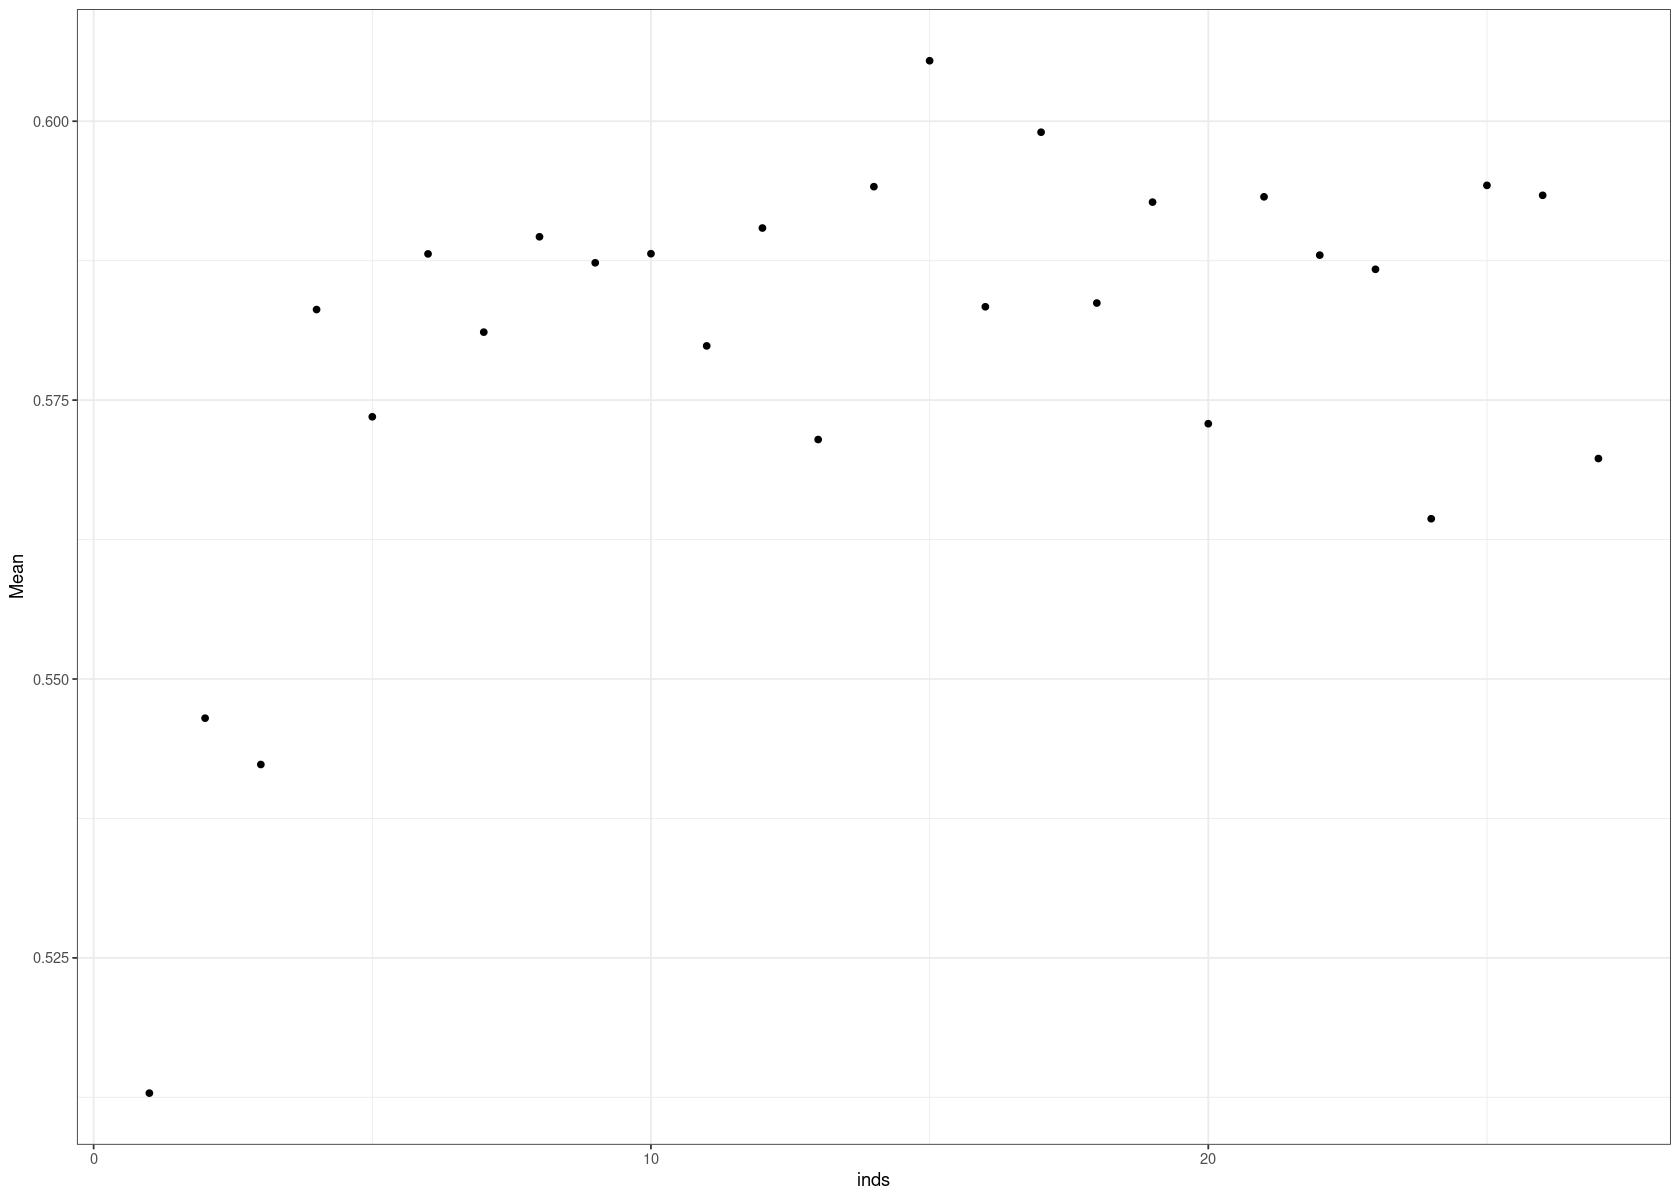

In [145]:
ggplot(CIs, aes(x=inds, y=Mean)) + geom_point()

In [146]:
CIs_7 = CIs #bind_rows(CIs_1_50, CIs)

In [147]:
CIs_7

inds,Mean,SD
<int>,<dbl>,<dbl>
1,0.5128772,0.13428909
2,0.5464895,0.11796546
3,0.5423354,0.11632175
4,0.5831189,0.10195561
5,0.5735052,0.10853397
6,0.5881079,0.10497296
7,0.5810925,0.11508054
8,0.5896412,0.10918939
9,0.5873096,0.09438719


In [148]:
saveRDS(object = CIs_7, "../data/CIs_7.rds")

# Visualize

In [223]:
CIs_1 = readRDS("../data/CIs_mb.rds")
CIs_2 = readRDS("../data/CIs_2.rds")
CIs_3 = readRDS("../data/CIs_3.rds")
CIs_4 = readRDS("../data/CIs_4.rds")
CIs_5 = readRDS("../data/CIs_5.rds")
CIs_6 = readRDS("../data/CIs_6.rds")
CIs_7 = readRDS("../data/CIs_7.rds")
CIs_8 = readRDS("../data/CIs_8.rds")

In [224]:
CIs_1$Dataset = names(dfs)[1]
CIs_2$Dataset = names(dfs)[2]
CIs_3$Dataset = names(dfs)[3]
CIs_4$Dataset = names(dfs)[4]
CIs_5$Dataset = names(dfs)[5]
CIs_6$Dataset = names(dfs)[6]
CIs_7$Dataset = names(dfs)[7]
CIs_8$Dataset = names(dfs)[8]

In [225]:
#head(CIs_2)

In [226]:
CIs = bind_rows(CIs_1, CIs_2, CIs_3, CIs_4, CIs_5, CIs_6, CIs_7, CIs_8)

In [227]:
head(CIs)

inds,Mean,SD,Dataset
<int>,<dbl>,<dbl>,<chr>
1,0.5264593,0.04172793,METABRIC
2,0.5300519,0.03936543,METABRIC
3,0.5466705,0.04365950,METABRIC
4,0.5551966,0.04799687,METABRIC
5,0.5570129,0.04470586,METABRIC
6,0.5585499,0.04423678,METABRIC


`geom_smooth()` using formula 'y ~ x'



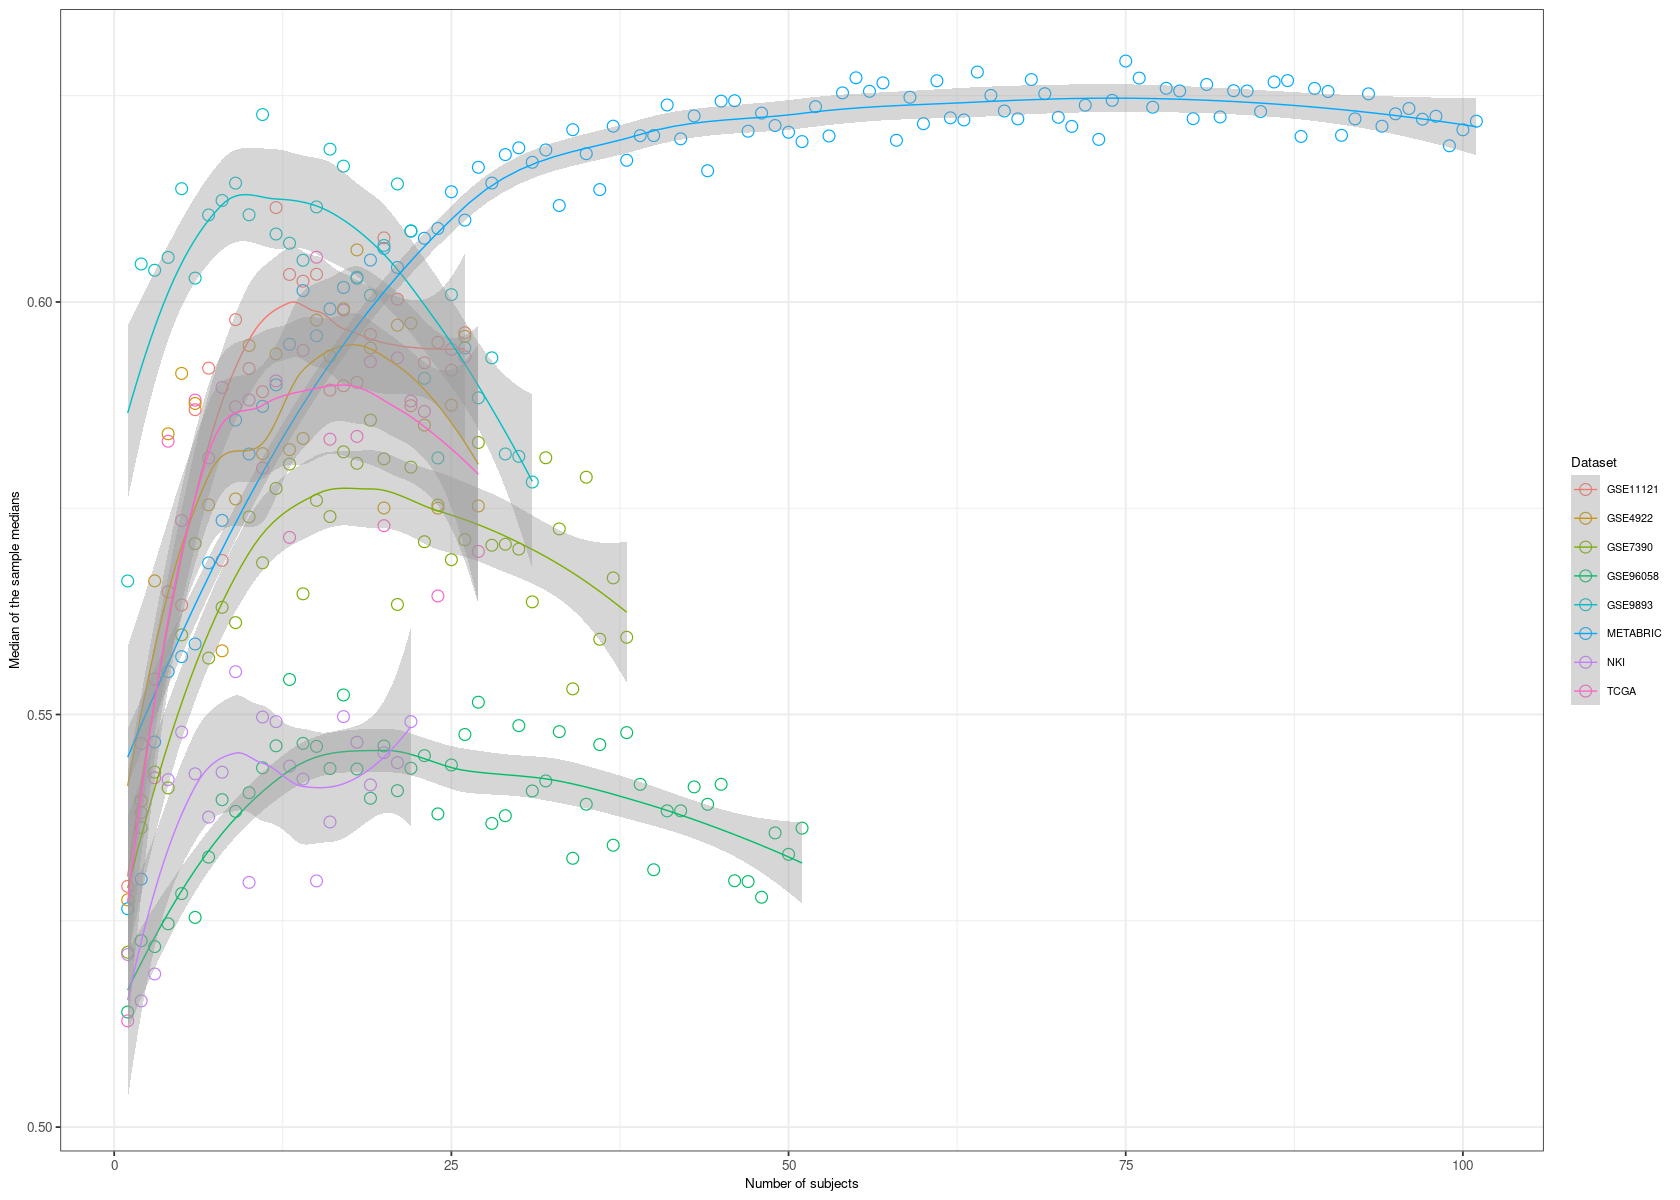

In [235]:
P = ggplot(CIs, aes(x=inds, y=Mean, color=Dataset)) + 
   geom_point(#color=rgb(0, 101, 165, maxColorValue=255), 
                 #fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=3,
                 stroke = 0.5
                )+
    geom_smooth(method = "loess", size=0.4)+
  #scale_x_continuous(trans='log10')+
  #stat_cor(method = "pearson", label.x.npc = "middle",label.y.npc = "top", size=3.5) +
 # geom_errorbar(aes(ymin=Mean-1.96*SD, ymax=Mean+1.96*SD), width=.4,
 #                position=position_dodge(1.9))+ 
  xlab("Number of subjects")+
  ylab("Median of the sample medians")+
#   expand_limits(y = c(0.5, 1.2))  
  theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  theme(strip.text.y = element_text(angle = 0))
P

In [230]:
gb = ggplot_build(P)

exact_x_value_of_the_curve_maximum = gb$data[[1]]$x[which(diff(sign(diff(gb$data[[1]]$y)))==-2)+1]

`geom_smooth()` using formula 'y ~ x'



In [231]:
exact_x_value_of_the_curve_maximum

[1]   9  14  20  22  25  27  30  32  34  37  41  43  46  48  52  55  57  59
 [19]  61  64  68  72  75  78  81  83  87  89  93  96  98 101   4   7   9  12
 [37]  15  20  24  26   2   5   8  13  17  20  23  27  30  33  36  38  43  45
 [55]  49  51   3   6   8  10  13  15  17  19  22  24  27  29  32  35  37   2
 [73]   5   9  11  16  21  25  28   5   9  11  17  20  22   2   4   6   8  10
 [91]  12  15  17  19  21  25   5  10  12  15  18  22  26

In [31]:
library("tidyverse")
library("ggsci")
library(gghighlight)

In [219]:
path = "../figures/"

FONT = "Helvetica"
FONTSIZE = 12

THEME = theme(
      axis.text.x = element_text(family=FONT, size = FONTSIZE/.pt),
      axis.text.y = element_text(family=FONT, size = FONTSIZE/.pt),
      text=element_text(family=FONT, size = FONTSIZE/.pt))

In [220]:
pal = pal_npg("nrc", alpha = 0.7)(9)

In [221]:
theme_set(theme_bw())

`geom_smooth()` using formula 'y ~ x'



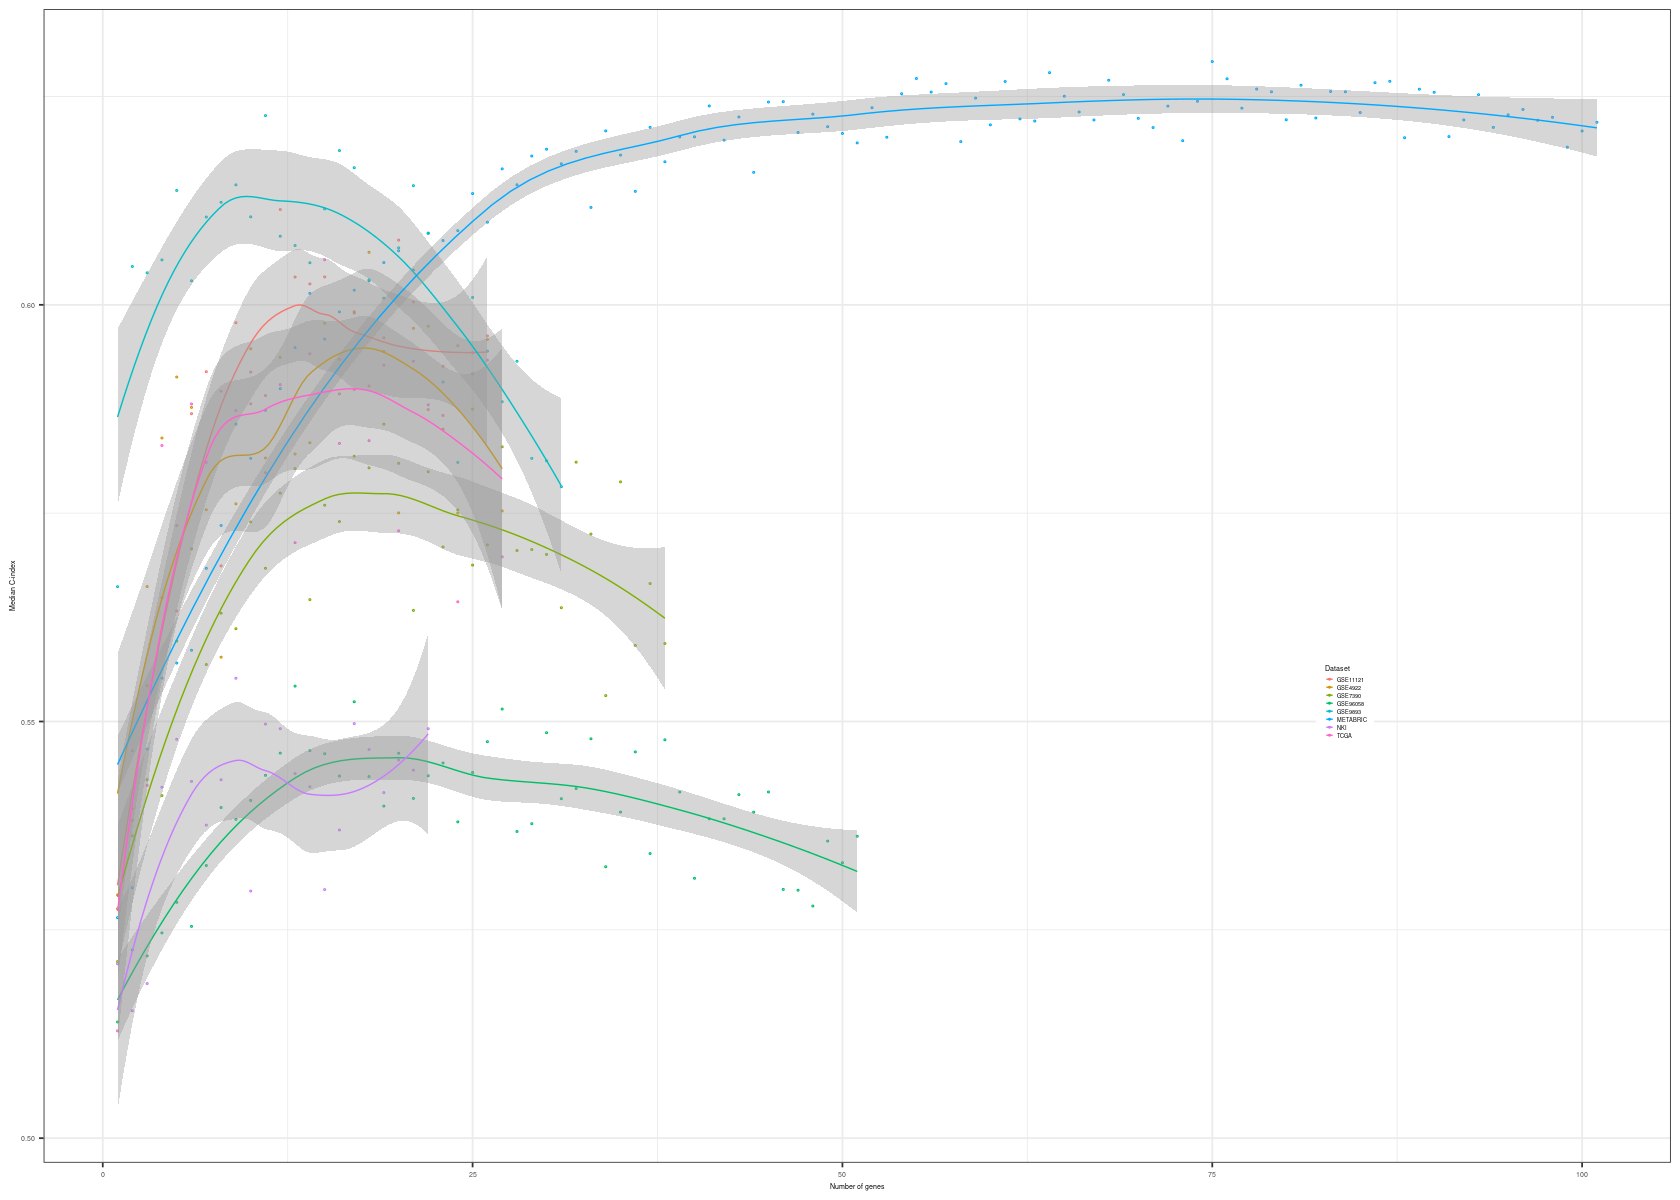

In [269]:
P = ggplot(CIs, aes(x=inds, y=Mean, color=Dataset)) +
   # geom_line(size=0.1) +
    geom_point(shape=21, size=0.2) +
    geom_smooth(method = "loess", size=0.4)+
    xlab("Number of genes") +
    ylab("Median C-index")+
    theme(legend.position = c(0.8, 0.4),
         legend.key.size = unit(0.01, 'npc'),
         )+
    guides(color=guide_legend(override.aes=list(fill=NA)))+
  THEME
P

`geom_smooth()` using formula 'y ~ x'



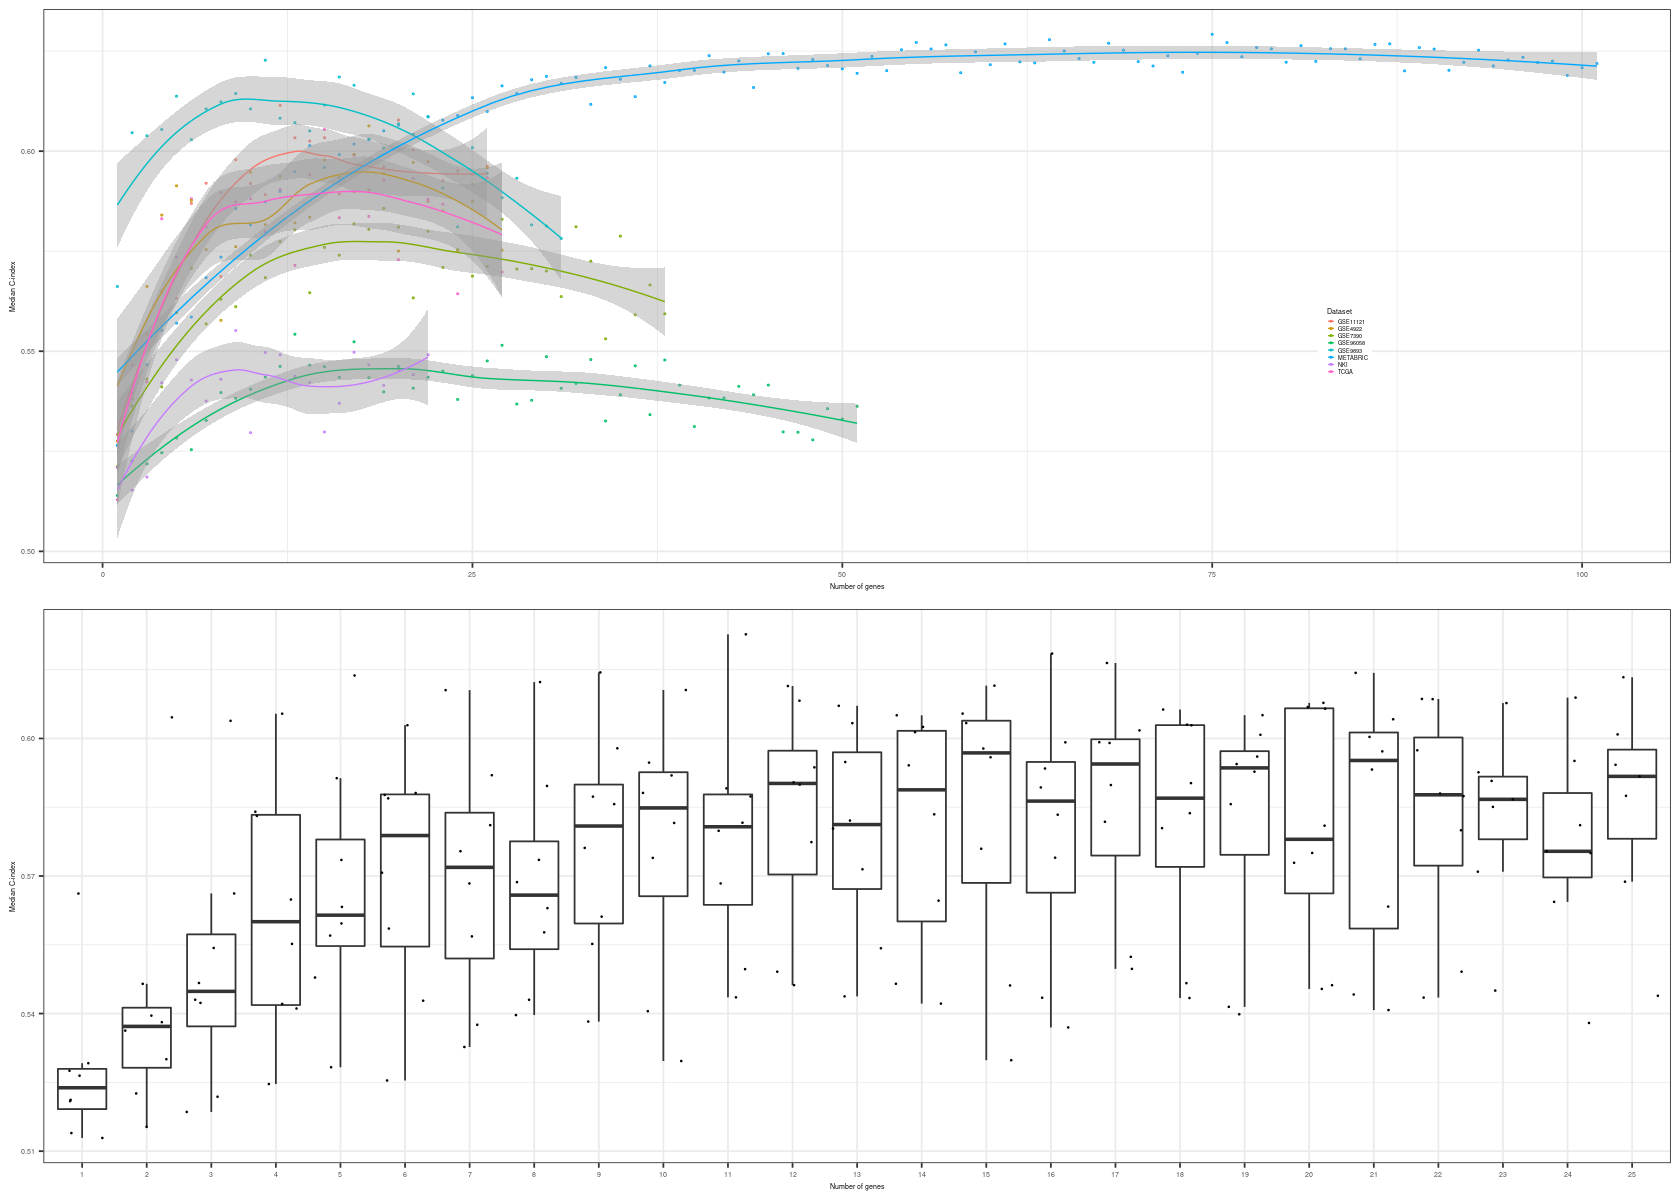

In [286]:
ggarrange(P, P1, ncol = 1, nrow = 2)

In [287]:
path = "../figures/"

In [288]:
ggsave(filename = "si_signature_size.tiff", path = path, width = 8.7, height = 8.7*(3/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_signature_size.png",  path = path, width = 8.7, height = 8.7*(3/3), units = "cm", device='png',  dpi=700)

## Together

In [179]:
CIs$inds = as.factor(CIs$inds)

In [180]:
head(CIs)

inds,Mean,SD,Dataset
<fct>,<dbl>,<dbl>,<chr>
1,0.5264593,0.04172793,METABRIC
2,0.5300519,0.03936543,METABRIC
3,0.5466705,0.04365950,METABRIC
4,0.5551966,0.04799687,METABRIC
5,0.5570129,0.04470586,METABRIC
6,0.5585499,0.04423678,METABRIC


In [188]:
tmp = CIs[as.numeric(as.character(CIs$inds))<=30,]
dim(tmp)

[1] 222   4

In [217]:
#tmp = tmp %>% 
#    group_by(inds) %>%
#    mutate(UpperCI = median(Mean)# + 1.58 * IQR(Mean)/8
#          )

In [216]:
#p <- ggplot(tmp, aes(x=inds, y=UpperCI)) + 
#   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
#                 fill=rgb(205, 217, 235, maxColorValue=255),
#                 pch=21, 
#                 size=3,
#                 stroke = 0.5
#                )
#p

In [195]:
str(p)

List of 9
 $ data       : tibble [222 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ inds   : Factor w/ 101 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..$ Mean   : num [1:222] 0.526 0.53 0.547 0.555 0.557 ...
  ..$ SD     : num [1:222] 0.0417 0.0394 0.0437 0.048 0.0447 ...
  ..$ Dataset: chr [1:222] "METABRIC" "METABRIC" "METABRIC" "METABRIC" ...
 $ layers     :List of 2
  ..$ :Classes 'LayerInstance', 'Layer', 'ggproto', 'gg' <ggproto object: Class LayerInstance, Layer, gg>
    aes_params: list
    compute_aesthetics: function
    compute_geom_1: function
    compute_geom_2: function
    compute_position: function
    compute_statistic: function
    computed_geom_params: list
    computed_mapping: uneval
    computed_stat_params: list
    data: waiver
    draw_geom: function
    finish_statistics: function
    geom: <ggproto object: Class GeomBoxplot, Geom, gg>
        aesthetics: function
        default_aes: uneval
        draw_group: function
        draw_key: function
        d

In [161]:
mm = vector("list", 30)
ms = vector("list", 30)
for (i in 1:30){
    mm[[i]] = median(CIs$Mean[CIs$inds==i])
    ms[[i]] = sd(CIs$Mean[CIs$inds==i])

}

In [242]:
df = tibble(inds = 1:22, Median = unlist(mm)[1:22], Std = unlist(ms)[1:22])

In [244]:
head(CIs)

inds,Mean,SD,Dataset
<int>,<dbl>,<dbl>,<chr>
1,0.5264593,0.04172793,METABRIC
2,0.5300519,0.03936543,METABRIC
3,0.5466705,0.04365950,METABRIC
4,0.5551966,0.04799687,METABRIC
5,0.5570129,0.04470586,METABRIC
6,0.5585499,0.04423678,METABRIC


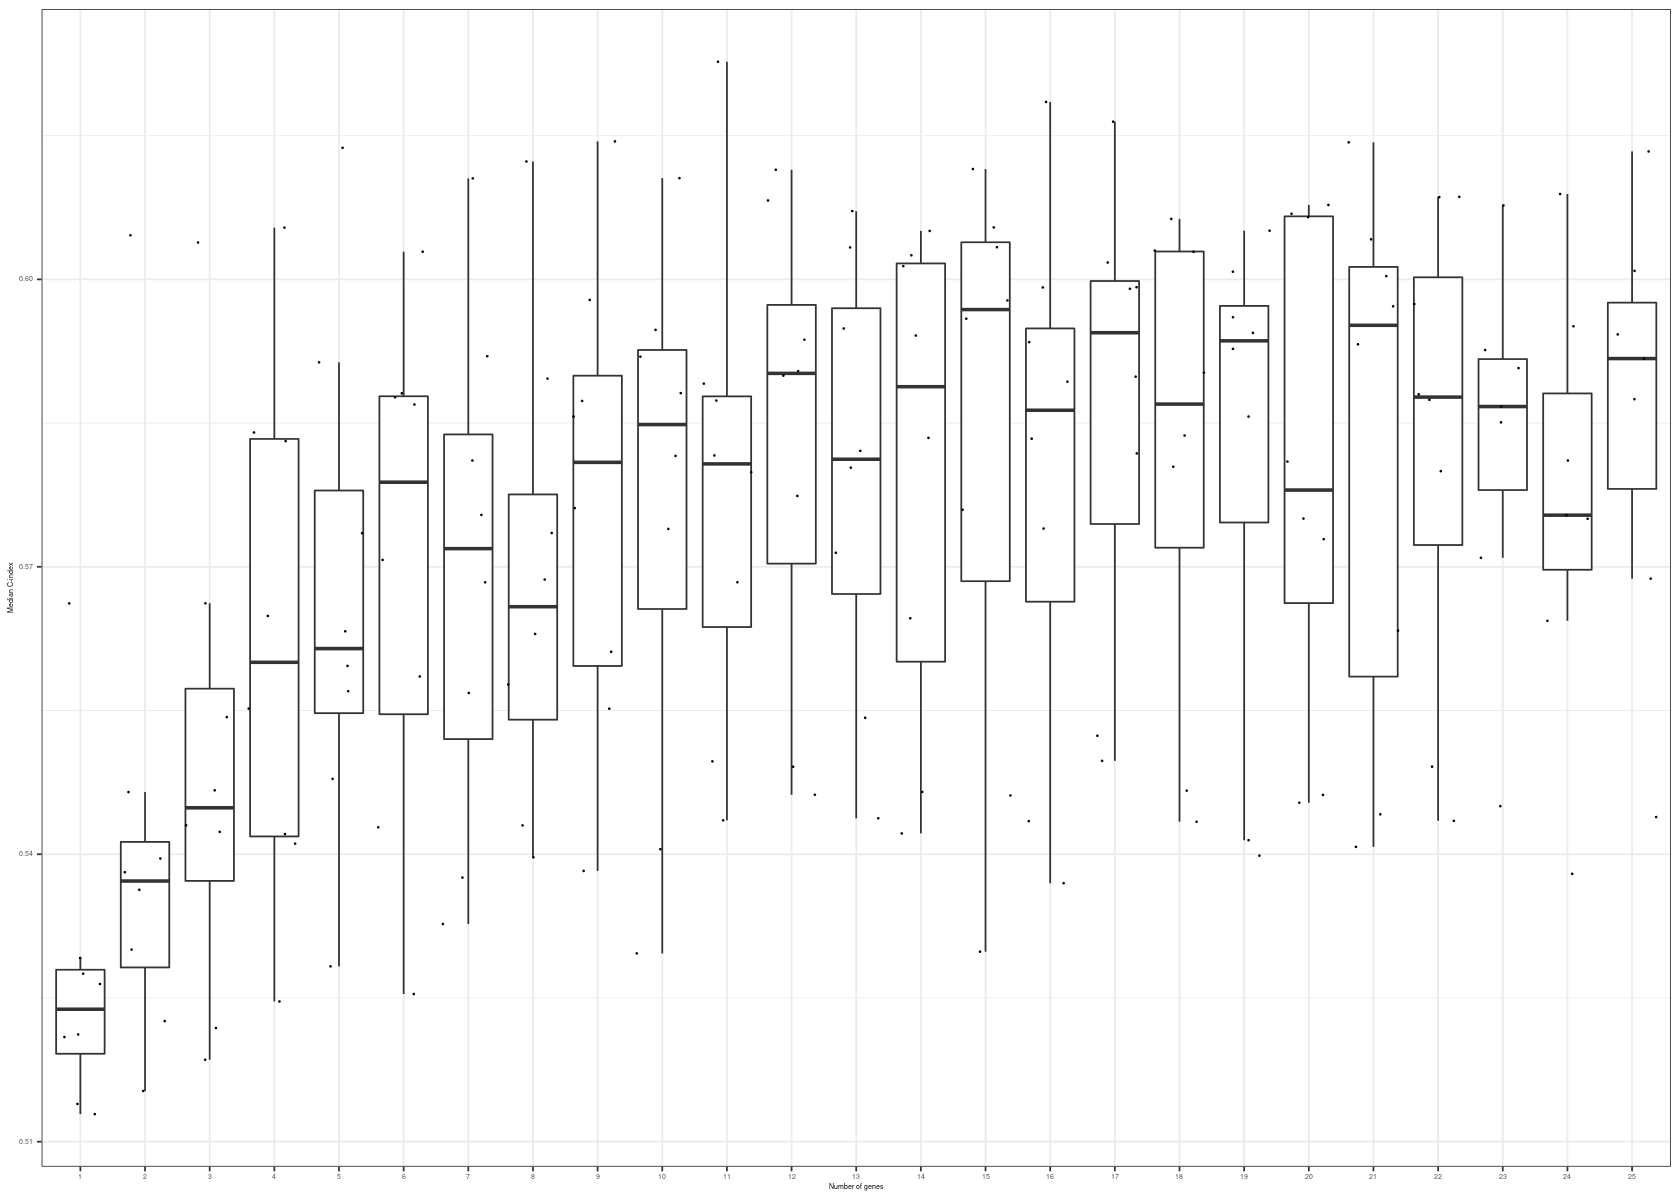

In [285]:
tmp = CIs[CIs$inds<=25,]
P1 = ggplot(tmp, aes(x=as.factor(inds), y=Mean)) + 
  geom_boxplot(outlier.alpha = 0.0,) +geom_jitter(size=0.1) + ylab("Median C-index") + xlab("Number of genes") + THEME
P1

`geom_smooth()` using formula 'y ~ x'



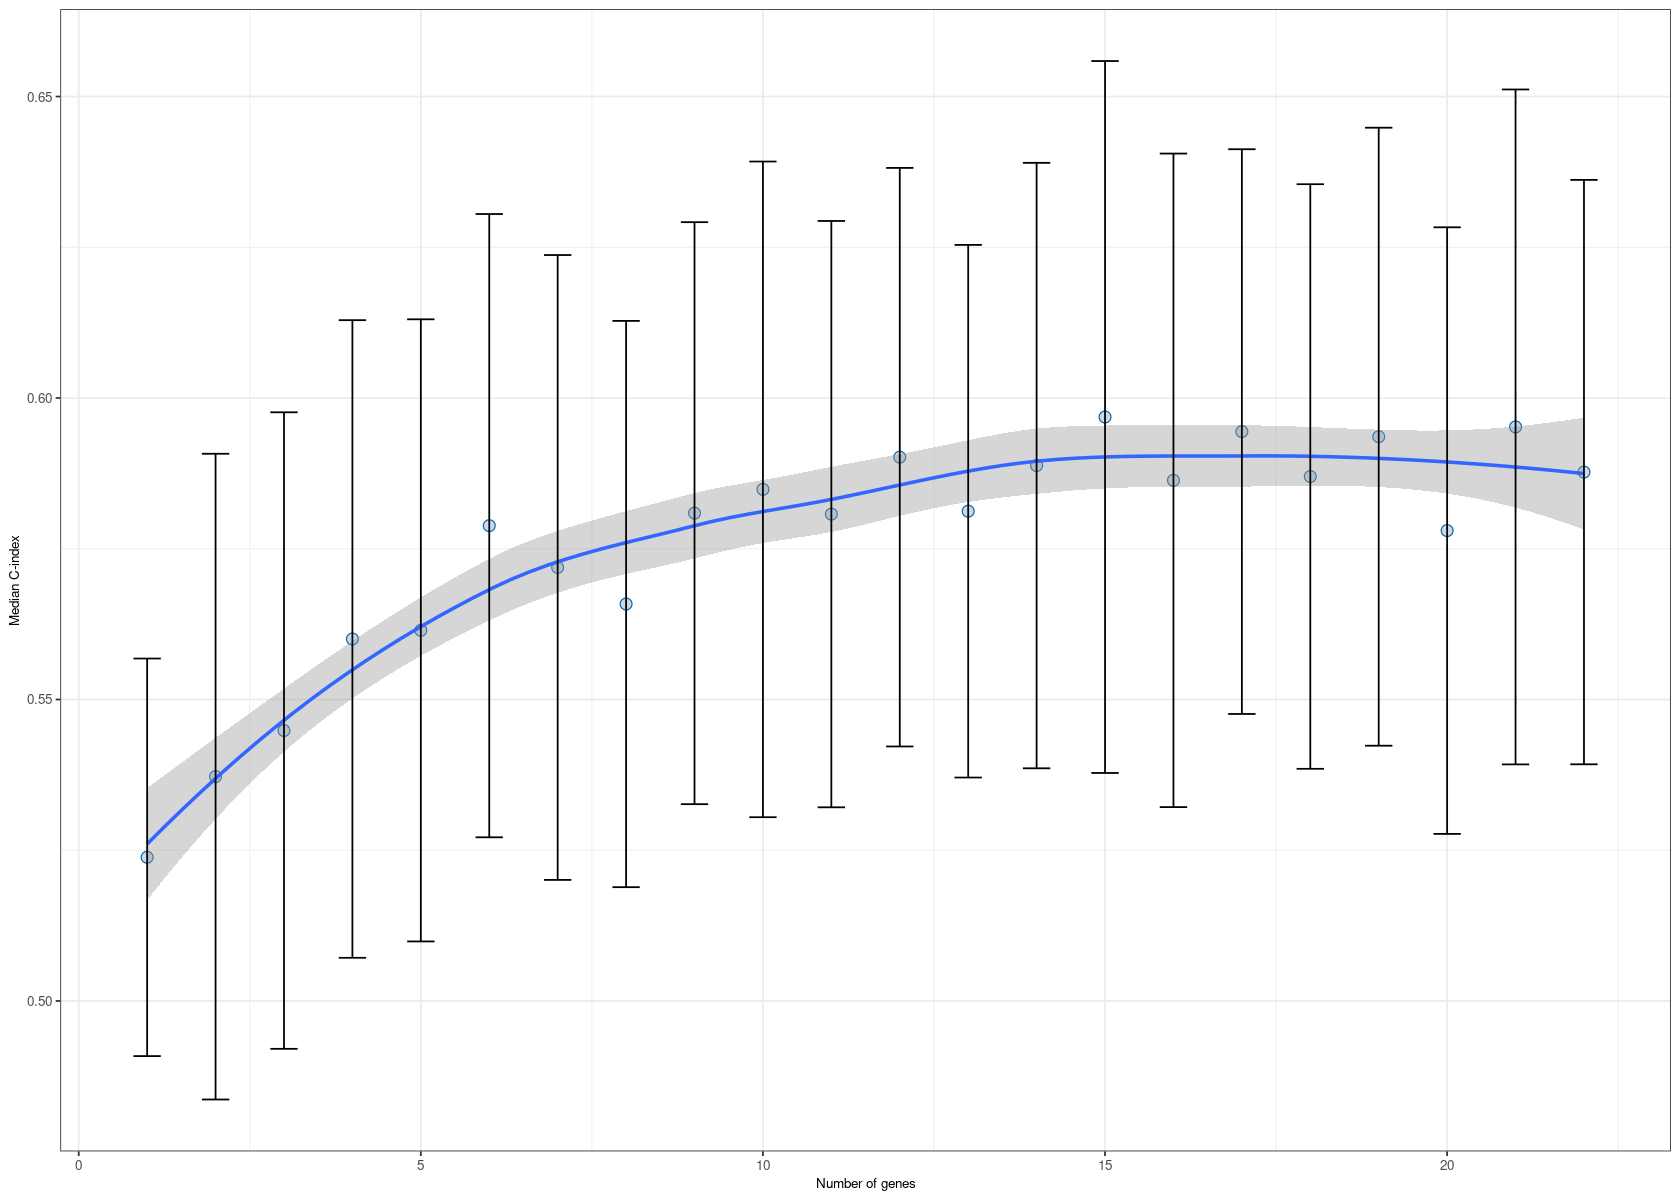

In [243]:
P1 = ggplot(df, aes(x=inds, y=Median)) + 
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=3,
                 stroke = 0.5
                )+
  stat_smooth(method = "loess", size=1)+
  geom_errorbar(aes(ymin=Median-1.96*Std, ymax=Median+1.96*Std), width=.4,
                 position=position_dodge(1.9))+ 
  xlab("Number of genes")+
  ylab("Median C-index")+
#   expand_limits(y = c(0.5, 1.2))  
  theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  theme(strip.text.y = element_text(angle = 0))
P1

In [104]:
gb = ggplot_build(P)

`geom_smooth()` using formula 'y ~ x'



In [105]:
exact_x_value_of_the_curve_maximum = gb$data[[1]]$x[which(diff(sign(diff(gb$data[[1]]$y)))==-2)+1]

In [106]:
exact_x_value_of_the_curve_maximum

[1]  6 10 12 15 18 21 26 28

`geom_smooth()` using formula 'y ~ x'



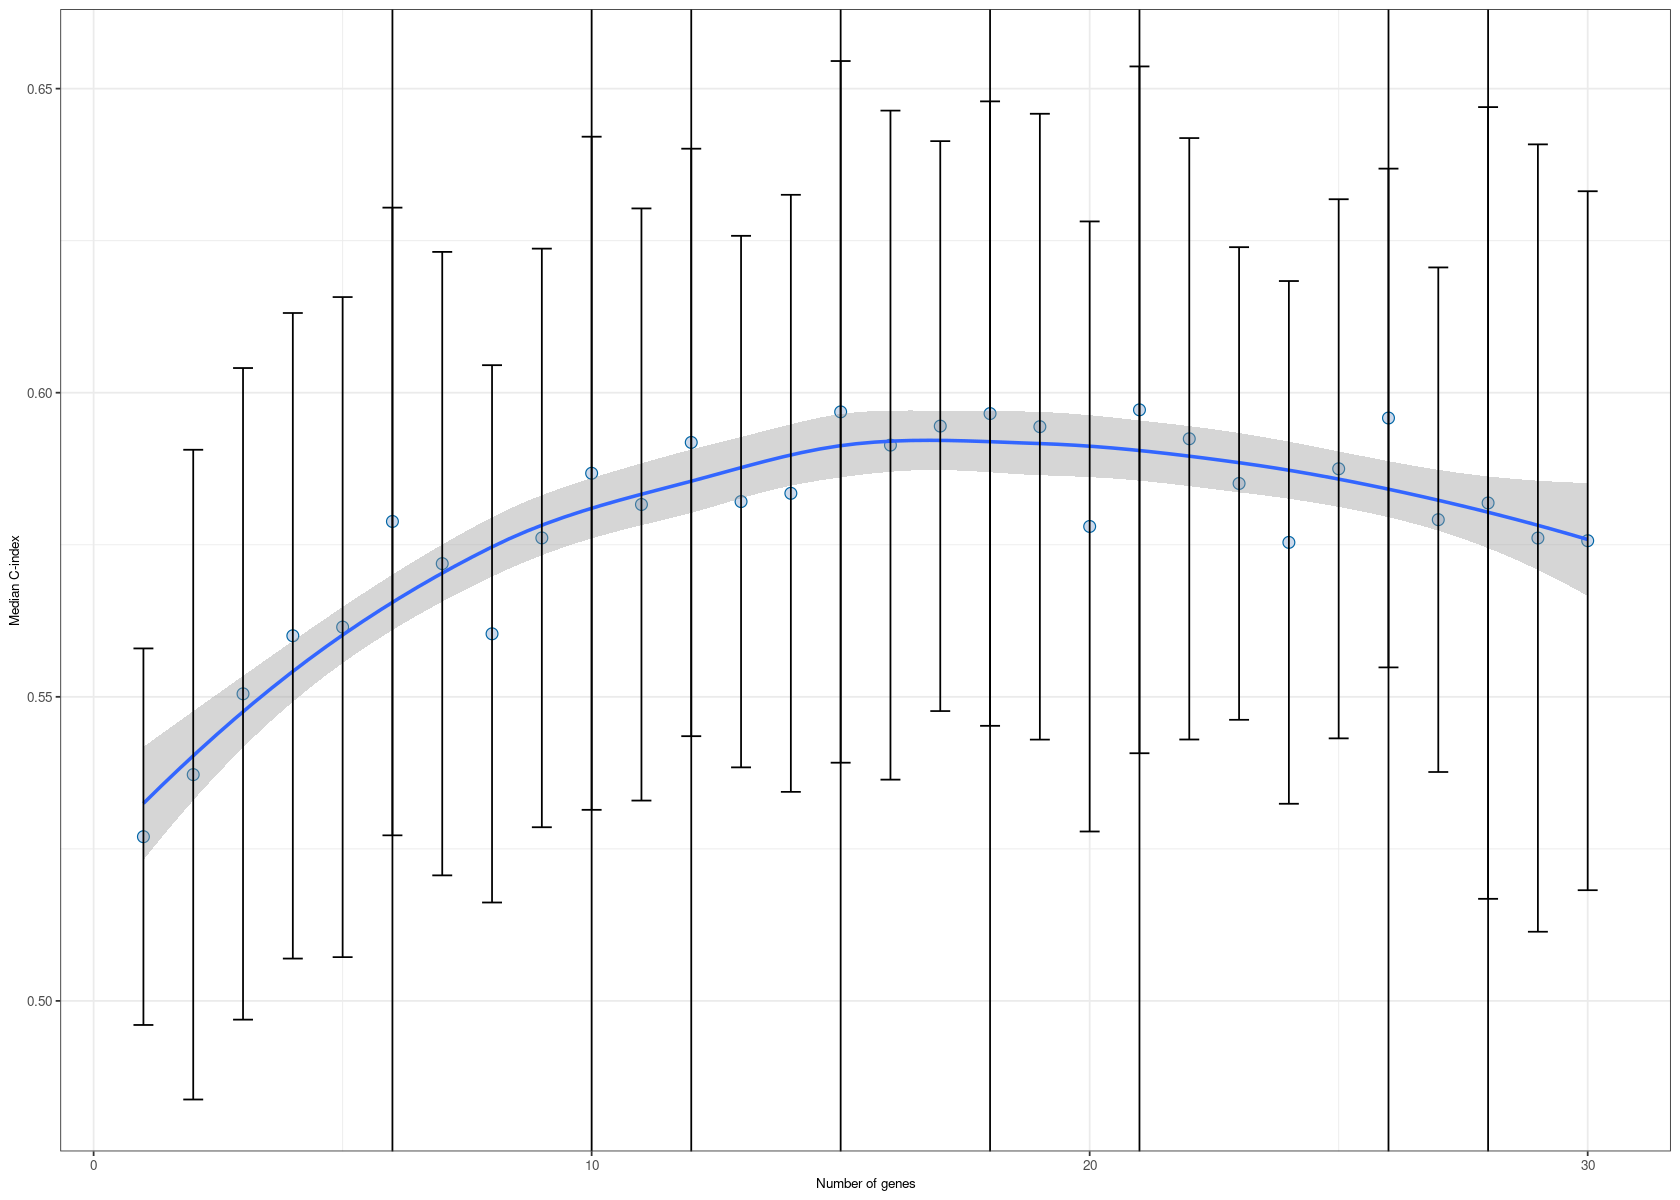

In [107]:
P + geom_vline(xintercept=exact_x_value_of_the_curve_maximum)